In [394]:
import numpy as np
import pandas as pd
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

import plotly.offline as pyo
import plotly.graph_objs as go
pyo.init_notebook_mode()
#init_notebook_mode(connected=True)

import matplotlib.pyplot as plt
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

## Primeros pasos

Lectura del db y primeras visualizaciones

In [395]:
dataframe = pd.read_csv("players_20.csv")

display(dataframe.sample(5))
print(f"Veamos algunas características de los datos. Los tipos de datos de cada columna son: {dataframe.dtypes}")
print(f"Veamos una descripción de las columnas: ")
pd.set_option('display.max_columns', None)
display(dataframe.describe(include = 'all'))

sofifa_id                                         player_url  \
8265     213993  https://sofifa.com/player/213993/francesco-for...   
5396     190502  https://sofifa.com/player/190502/gregory-serti...   
7328     182412  https://sofifa.com/player/182412/lin-dai/20/15...   
9086     251941  https://sofifa.com/player/251941/tomislav-strk...   
2477     188879  https://sofifa.com/player/188879/alfred-ndiaye...   

      short_name                  long_name  age         dob  height_cm  \
8265    F. Forte            Francesco Forte   26  1993-05-01        187   
5396   G. Sertic             Grégory Sertic   29  1989-08-05        183   
7328     Dai Lin                         戴琳   31  1987-11-28        188   
9086  T. Štrkalj           Tomislav Štrkalj   22  1996-08-02        184   
2477  A. N'Diaye  Alfred John Momar N'Diaye   29  1990-03-06        189   

      weight_kg nationality                        club  overall  potential  \
8265         75       Italy            Waasland-Beveren       67         69   
5396         76      France      Olympique de Marseille       70         70   
7328         79    China PR  Shandong Luneng TaiShan FC       68         68   
9086         75     Croatia                  CD Tondela       66         73   
2477         90     Senegal                   Málaga CF       74         74   

      value_eur  wage_eur player_positions preferred_foot  \
8265     925000      5000               ST           Left   
5396    1500000     17000          CDM, CB          Right   
7328     675000      7000               CB          Right   
9086     925000      2000               ST          Right   
2477    5500000     10000          CM, CDM          Right   

      international_reputation  weak_foot  skill_moves      work_rate  \
8265                         1          3            2  Medium/Medium   
5396                         2          3            2  Medium/Medium   
7328                         1          3            2       Low/High   
9086                         1          2            2  Medium/Medium   
2477                         1          3            3    Medium/High   

     body_type real_face  release_clause_eur player_tags team_position  \
8265      Lean        No           1400000.0         NaN            ST   
5396      Lean       Yes           2900000.0         NaN           RES   
7328    Normal        No           1000000.0         NaN           RCB   
9086    Normal        No           2100000.0         NaN           RES   
2477    Stocky       Yes                 NaN   #Strength           SUB   

      team_jersey_number    loaned_from      joined  contract_valid_until  \
8265                 9.0            NaN  2018-07-26                2021.0   
5396                22.0            NaN  2017-01-30                2020.0   
7328                35.0            NaN  2014-01-02                2021.0   
9086                42.0            NaN  2019-08-14                2023.0   
2477                21.0  Villarreal CF         NaN                2020.0   

     nation_position  nation_jersey_number  pace  shooting  passing  \
8265             NaN                   NaN  57.0      67.0     55.0   
5396             NaN                   NaN  56.0      63.0     68.0   
7328             NaN                   NaN  61.0      54.0     54.0   
9086             NaN                   NaN  56.0      69.0     44.0   
2477             NaN                   NaN  71.0      63.0     71.0   

      dribbling  defending  physic  gk_diving  gk_handling  gk_kicking  \
8265       63.0       30.0    67.0        NaN          NaN         NaN   
5396       63.0       69.0    71.0        NaN          NaN         NaN   
7328       55.0       67.0    75.0        NaN          NaN         NaN   
9086       61.0       20.0    54.0        NaN          NaN         NaN   
2477       70.0       71.0    83.0        NaN          NaN         NaN   

      gk_reflexes  gk_speed  gk_positioning             player_traits  \


Veamos algunas características de los datos. Los tipos de datos de cada columna son: sofifa_id      int64
player_url    object
short_name    object
long_name     object
age            int64
               ...  
lb            object
lcb           object
cb            object
rcb           object
rb            object
Length: 104, dtype: object
Veamos una descripción de las columnas: 


sofifa_id                                         player_url  \
count    18278.000000                                              18278   
unique            NaN                                              18278   
top               NaN  https://sofifa.com/player/166736/magnus-anders...   
freq              NaN                                                  1   
mean    219738.864482                                                NaN   
std      27960.200461                                                NaN   
min        768.000000                                                NaN   
25%     204445.500000                                                NaN   
50%     226165.000000                                                NaN   
75%     240795.750000                                                NaN   
max     252905.000000                                                NaN   

          short_name   long_name           age         dob     height_cm  \
count          18278       18278  18278.000000       18278  18278.000000   
unique         17354       18218           NaN        6142           NaN   
top     J. Rodríguez  Liam Kelly           NaN  1992-02-29           NaN   
freq              11           3           NaN         113           NaN   
mean             NaN         NaN     25.283291         NaN    181.362184   
std              NaN         NaN      4.656964         NaN      6.756961   
min              NaN         NaN     16.000000         NaN    156.000000   
25%              NaN         NaN     22.000000         NaN    177.000000   
50%              NaN         NaN     25.000000         NaN    181.000000   
75%              NaN         NaN     29.000000         NaN    186.000000   
max              NaN         NaN     42.000000         NaN    205.000000   

           weight_kg nationality        club       overall     potential  \
count   18278.000000       18278       18278  18278.000000  18278.000000   
unique           NaN         162         698           NaN           NaN   
top              NaN     England  CD Leganés           NaN           NaN   
freq             NaN        1667          33           NaN           NaN   
mean       75.276343         NaN         NaN     66.244994     71.546887   
std         7.047744         NaN         NaN      6.949953      6.139669   
min        50.000000         NaN         NaN     48.000000     49.000000   
25%        70.000000         NaN         NaN     62.000000     67.000000   
50%        75.000000         NaN         NaN     66.000000     71.000000   
75%        80.000000         NaN         NaN     71.000000     75.000000   
max       110.000000         NaN         NaN     94.000000     95.000000   

           value_eur       wage_eur player_positions preferred_foot  \
count   1.827800e+04   18278.000000            18278          18278   
unique           NaN            NaN              643              2   
top              NaN            NaN               CB          Right   
freq             NaN            NaN             2322          13960   
mean    2.484038e+06    9456.942773              NaN            NaN   
std     5.585481e+06   21351.714095              NaN            NaN   
min     0.000000e+00       0.000000              NaN            NaN   
25%     3.250000e+05    1000.000000              NaN            NaN   
50%     7.000000e+05    3000.000000              NaN            NaN   
75%     2.100000e+06    8000.000000              NaN            NaN   
max     1.055000e+08  565000.000000              NaN            NaN   

        international_reputation     weak_foot   skill_moves      work_rate  \
count               18278.000000  18278.000000  18278.000000          18278   
unique                       NaN           NaN           NaN              9   
top                          NaN           NaN           NaN  Medium/Medium   
freq                         NaN           NaN           NaN           9875   
mean                    1

# Comenzamos con pequeña curación de datos

## Duplicados

In [396]:
# Lineas duplicadas

display(dataframe[dataframe.duplicated()])
display(dataframe[dataframe.index.duplicated()])

Empty DataFrame
Columns: [sofifa_id, player_url, short_name, long_name, age, dob, height_cm, weight_kg, nationality, club, overall, potential, value_eur, wage_eur, player_positions, preferred_foot, international_reputation, weak_foot, skill_moves, work_rate, body_type, real_face, release_clause_eur, player_tags, team_position, team_jersey_number, loaned_from, joined, contract_valid_until, nation_position, nation_jersey_number, pace, shooting, passing, dribbling, defending, physic, gk_diving, gk_handling, gk_kicking, gk_reflexes, gk_speed, gk_positioning, player_traits, attacking_crossing, attacking_finishing, attacking_heading_accuracy, attacking_short_passing, attacking_volleys, skill_dribbling, skill_curve, skill_fk_accuracy, skill_long_passing, skill_ball_control, movement_acceleration, movement_sprint_speed, movement_agility, movement_reactions, movement_balance, power_shot_power, power_jumping, power_stamina, power_strength, power_long_shots, mentality_aggression, mentality_interceptions, mentality_positioning, mentality_vision, mentality_penalties, mentality_composure, defending_marking, defending_standing_tackle, defending_sliding_tackle, goalkeeping_diving, goalkeeping_handling, goalkeeping_kicking, goalkeeping_positioning, goalkeeping_reflexes, ls, st, rs, lw, lf, cf, rf, rw, lam, cam, ram, lm, lcm, cm, rcm, rm, lwb, ldm, cdm, rdm, rwb, lb, ...]
Index: []

Empty DataFrame
Columns: [sofifa_id, player_url, short_name, long_name, age, dob, height_cm, weight_kg, nationality, club, overall, potential, value_eur, wage_eur, player_positions, preferred_foot, international_reputation, weak_foot, skill_moves, work_rate, body_type, real_face, release_clause_eur, player_tags, team_position, team_jersey_number, loaned_from, joined, contract_valid_until, nation_position, nation_jersey_number, pace, shooting, passing, dribbling, defending, physic, gk_diving, gk_handling, gk_kicking, gk_reflexes, gk_speed, gk_positioning, player_traits, attacking_crossing, attacking_finishing, attacking_heading_accuracy, attacking_short_passing, attacking_volleys, skill_dribbling, skill_curve, skill_fk_accuracy, skill_long_passing, skill_ball_control, movement_acceleration, movement_sprint_speed, movement_agility, movement_reactions, movement_balance, power_shot_power, power_jumping, power_stamina, power_strength, power_long_shots, mentality_aggression, mentality_interceptions, mentality_positioning, mentality_vision, mentality_penalties, mentality_composure, defending_marking, defending_standing_tackle, defending_sliding_tackle, goalkeeping_diving, goalkeeping_handling, goalkeeping_kicking, goalkeeping_positioning, goalkeeping_reflexes, ls, st, rs, lw, lf, cf, rf, rw, lam, cam, ram, lm, lcm, cm, rcm, rm, lwb, ldm, cdm, rdm, rwb, lb, ...]
Index: []

In [397]:
# Caracteres extraños (fuera de ascii)

dataframe.columns[~dataframe.columns.str.match(r'^(\w+)$')]

Index([], dtype='object')

In [398]:
columnas = dataframe.columns
for p in columnas:
    print(p)

sofifa_id
player_url
short_name
long_name
age
dob
height_cm
weight_kg
nationality
club
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skill_moves
work_rate
body_type
real_face
release_clause_eur
player_tags
team_position
team_jersey_number
loaned_from
joined
contract_valid_until
nation_position
nation_jersey_number
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defe

In [399]:
#Cantidad relativa de datos
print(f"Shape del dataframe: {dataframe.shape}")
print(f"Shape del dataframe sin na {dataframe.dropna()}")


len(dataframe.dropna())/len(dataframe)

Shape del dataframe: (18278, 104)
Shape del dataframe sin na Empty DataFrame
Columns: [sofifa_id, player_url, short_name, long_name, age, dob, height_cm, weight_kg, nationality, club, overall, potential, value_eur, wage_eur, player_positions, preferred_foot, international_reputation, weak_foot, skill_moves, work_rate, body_type, real_face, release_clause_eur, player_tags, team_position, team_jersey_number, loaned_from, joined, contract_valid_until, nation_position, nation_jersey_number, pace, shooting, passing, dribbling, defending, physic, gk_diving, gk_handling, gk_kicking, gk_reflexes, gk_speed, gk_positioning, player_traits, attacking_crossing, attacking_finishing, attacking_heading_accuracy, attacking_short_passing, attacking_volleys, skill_dribbling, skill_curve, skill_fk_accuracy, skill_long_passing, skill_ball_control, movement_acceleration, movement_sprint_speed, movement_agility, movement_reactions, movement_balance, power_shot_power, power_jumping, power_stamina, power_stren

0.0

## Hay muchos nulos referidos a data categorica que no es relevante. Además, hay que diferenciar los datos de arqueros.

In [400]:
#Nos quedamos con los skills
skills_ratings = ["pace", "shooting", "passing", "dribbling", "defending", "physic",
                  "gk_diving", "gk_handling", "gk_kicking", "gk_reflexes", "gk_speed", "gk_positioning", 
                  #"player", 
                  "attacking_crossing", "attacking_finishing", "attacking_heading_accuracy", "attacking_short_passing", "attacking_volleys",
                  "skill_dribbling", "skill_curve", "skill_fk_accuracy", "skill_long_passing", "skill_ball_control", "movement_acceleration",
                  "movement_sprint_speed", "movement_agility", "movement_reactions", "movement_balance", "power_shot_power", "power_jumping",
                  "power_stamina", "power_strength", "power_long_shots", "mentality_aggression", "mentality_interceptions", "mentality_positioning",
                  "mentality_vision", "mentality_penalties", "mentality_composure", "defending_marking", "defending_standing_tackle", "defending_sliding_tackle",
                  "goalkeeping_diving", "goalkeeping_handling", "goalkeeping_kicking", "goalkeeping_positioning", "goalkeeping_reflexes", 
                  "overall"
                  ]
#Dejamos, de momento, fuera los siguientes:
#"ls", "st", "rs", "lw", "lf", "cf", "rf",
                  #"rw", "lam", "cam", "ram", "lm", "lcm",
                  #"cm", "rcm", "rm", "lwb", "ldm", "cdm",
                  #"rdm", "rwb", "lb", "lcb", "cb", "rcb", "rb"

pd.set_option('display.max_columns', None)
dataframe_skills=dataframe[skills_ratings]
dataframe_skills.sample(5)

pace  shooting  passing  dribbling  defending  physic  gk_diving  \
6331   74.0      50.0     63.0       68.0       63.0    65.0        NaN   
7832   57.0      24.0     46.0       51.0       62.0    78.0        NaN   
10324  64.0      32.0     53.0       62.0       65.0    64.0        NaN   
10130  65.0      65.0     56.0       62.0       31.0    61.0        NaN   
10823  90.0      58.0     56.0       67.0       38.0    63.0        NaN   

       gk_handling  gk_kicking  gk_reflexes  gk_speed  gk_positioning  \
6331           NaN         NaN          NaN       NaN             NaN   
7832           NaN         NaN          NaN       NaN             NaN   
10324          NaN         NaN          NaN       NaN             NaN   
10130          NaN         NaN          NaN       NaN             NaN   
10823          NaN         NaN          NaN       NaN             NaN   

       attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
6331                   67                   50                          41   
7832                   25                   22                          66   
10324                  63                   29                          58   
10130                  59                   67                          73   
10823                  66                   59                          59   

       attacking_short_passing  attacking_volleys  skill_dribbling  \
6331                        66                 42               64   
7832                        62                 27               46   
10324                       60                 29               62   
10130                       63                 63               62   
10823                       55                 49               65   

       skill_curve  skill_fk_accuracy  skill_long_passing  skill_ball_control  \
6331            65                 61                  65                  67   
7832            24                 22                  57                  58   
10324           30                 40                  47                  59   
10130           51                 41                  48                  64   
10823           50                 43                  51                  62   

       movement_acceleration  movement_sprint_speed  movement_agility  \
6331                      77                     72                78   
7832                      55                     59                49   
10324                     66                     63                67   
10130                     67                     63                62   
10823                     88                     92                89   

       movement_reactions  movement_balance  power_shot_power  power_jumping  \
6331                   71                83                59             64   
7832                   62                60                32             79   
10324                  65                70                35             70   
10130                  50                58                63             63   
10823                  53                84                61             63   

       power_stamina  power_strength  power_long_shots  mentality_aggression  \
6331              73              61                45                    63   
7832              69              83                20                    74   
10324             69              63                28                    59   
10130             62              62                65                    56   
10823             59              71                53                    48   

       mentality_interceptions  mentality_positioning  mentality_vision  \
6331                        72                     55                53   
7832                        65                     25                40   
10324                       64                     48                42   
10130                       28         

## Tratamiento de NaN

Tomaremos dos estrategias: imputar a 0 los datos sobre arqueros para jugadores no arqueros, esto debería permitirnos identificar facilmente los arqueros y trabajar sobre el resto de valores nulos imputando medias o medianas.

In [401]:
# get the number of missing data points per column
missing_values_count = dataframe_skills.isna().sum()

# look at the # of missing points in the first ten columns
missing_values_count[missing_values_count > 0]

pace               2036
shooting           2036
passing            2036
dribbling          2036
defending          2036
physic             2036
gk_diving         16242
gk_handling       16242
gk_kicking        16242
gk_reflexes       16242
gk_speed          16242
gk_positioning    16242
dtype: int64

In [402]:
from sklearn.impute import SimpleImputer

In [403]:
df_copy = dataframe_skills.copy(deep=True)
display(df_copy.sample(3))

mean_imputer = SimpleImputer(strategy = "mean")
median_imputer = SimpleImputer(strategy = "median")
o_imputer = SimpleImputer(strategy = "constant", fill_value=0)

df_gks = df_copy.iloc[:, 6:12]
df_gks = o_imputer.fit_transform(df_gks)

df_others = df_copy.iloc[:, 0:6]
df_others = mean_imputer.fit_transform(df_others)

dataframe_skills.iloc[:, 6:12] = df_gks
dataframe_skills.iloc[:, 0:6] = df_others
display(dataframe_skills.head(3))
print(dataframe_skills.shape)
#print(dataframe_skills.isnull().sum())

pace  shooting  passing  dribbling  defending  physic  gk_diving  \
14227  73.0      59.0     47.0       61.0       27.0    67.0        NaN   
2140   79.0      68.0     68.0       78.0       50.0    66.0        NaN   
3719    NaN       NaN      NaN        NaN        NaN     NaN       72.0   

       gk_handling  gk_kicking  gk_reflexes  gk_speed  gk_positioning  \
14227          NaN         NaN          NaN       NaN             NaN   
2140           NaN         NaN          NaN       NaN             NaN   
3719          68.0        72.0         74.0      37.0            72.0   

       attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
14227                  43                   60                          56   
2140                   65                   67                          58   
3719                   16                   14                          12   

       attacking_short_passing  attacking_volleys  skill_dribbling  \
14227                       53                 53               60   
2140                        72                 63               81   
3719                        26                 15               14   

       skill_curve  skill_fk_accuracy  skill_long_passing  skill_ball_control  \
14227           40                 34                  42                  59   
2140            61                 53                  64                  77   
3719            15                 11                  34                  28   

       movement_acceleration  movement_sprint_speed  movement_agility  \
14227                     73                     73                72   
2140                      81                     78                82   
3719                      38                     37                37   

       movement_reactions  movement_balance  power_shot_power  power_jumping  \
14227                  54                74                62             75   
2140                   69                64                79             72   
3719                   68                47                54             67   

       power_stamina  power_strength  power_long_shots  mentality_aggression  \
14227             68              72                53                    52   
2140              78              65                62                    53   
3719              30              63                15                    35   

       mentality_interceptions  mentality_positioning  mentality_vision  \
14227                       15                     60                50   
2140                        62                     73                72   
3719                        19                     12                51   

       mentality_penalties  mentality_composure  defending_marking  \
14227                   58                   52                 35   
2140                    55                   71                 26   
3719                    35                   53                 12   

       defending_standing_tackle  defending_sliding_tackle  \
14227                         19                        18   
2140                          64                        49   
3719                          15                        14   

       goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
14227                  12                     9                   13   
2140                   10                    15                   11   
3719                   72                    68                   72   

       goalkeeping_positioning  goalkeeping_reflexes  overall  
14227                       11                    10       61  
2140                        16                     8       74  
3719                        72                    74       72

pace  shooting  passing  dribbling  defending  physic  gk_diving  \
0  87.0      92.0     92.0       96.0       39.0    66.0        0.0   
1  90.0      93.0     82.0       89.0       35.0    78.0        0.0   
2  91.0      85.0     87.0       95.0       32.0    58.0        0.0   

   gk_handling  gk_kicking  gk_reflexes  gk_speed  gk_positioning  \
0          0.0         0.0          0.0       0.0             0.0   
1          0.0         0.0          0.0       0.0             0.0   
2          0.0         0.0          0.0       0.0             0.0   

   attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0                  88                   95                          70   
1                  84                   94                          89   
2                  87                   87                          62   

   attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve  \
0                       92                 88               97           93   
1                       83                 87               89           81   
2                       87                 87               96           88   

   skill_fk_accuracy  skill_long_passing  skill_ball_control  \
0                 94                  92                  96   
1                 76                  77                  92   
2                 87                  81                  95   

   movement_acceleration  movement_sprint_speed  movement_agility  \
0                     91                     84                93   
1                     89                     91                87   
2                     94                     89                96   

   movement_reactions  movement_balance  power_shot_power  power_jumping  \
0                  95                95                86             68   
1                  96                71                95             95   
2                  92                84                80             61   

   power_stamina  power_strength  power_long_shots  mentality_aggression  \
0             75              68                94                    48   
1             85              78                93                    63   
2             81              49                84                    51   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                       40                     94                94   
1                       29                     95                82   
2                       36                     87                90   

   mentality_penalties  mentality_composure  defending_marking  \
0                   75                   96                 33   
1                   85                   95                 28   
2                   90                   94                 27   

   defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0                         37                        26                   6   
1                         32                        24                   7   
2                         26                        29                   9   

   goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
0                    11                   15                       14   
1                    11                   15                       14   
2                     9                   15                       15   

   goalkeeping_reflexes  overall  
0                     8       94  
1                    11       93  
2                    11       92

(18278, 47)


In [404]:
dataframe_skills.shape

(18278, 47)

In [405]:
n=10000 #cantidad de jugadores a considerar

dataframe_n=dataframe_skills.loc[:n] #se reduce la base a los n primeros jugadores

dataframe_n=dataframe_skills[(dataframe_skills['overall']>70)]

dataframe_n.shape
dataframe_n.sample(1)

pace  shooting  passing  dribbling  defending  physic  gk_diving  \
4149  76.0      30.0     51.0       58.0       70.0    75.0        0.0   

      gk_handling  gk_kicking  gk_reflexes  gk_speed  gk_positioning  \
4149          0.0         0.0          0.0       0.0             0.0   

      attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
4149                  47                   18                          75   

      attacking_short_passing  attacking_volleys  skill_dribbling  \
4149                       61                 32               54   

      skill_curve  skill_fk_accuracy  skill_long_passing  skill_ball_control  \
4149           49                 23                  55                  61   

      movement_acceleration  movement_sprint_speed  movement_agility  \
4149                     74                     77                68   

      movement_reactions  movement_balance  power_shot_power  power_jumping  \
4149                  65                52                50             88   

      power_stamina  power_strength  power_long_shots  mentality_aggression  \
4149             80              70                26                    77   

      mentality_interceptions  mentality_positioning  mentality_vision  \
4149                       68                     56                43   

      mentality_penalties  mentality_composure  defending_marking  \
4149                   36                   62                 70   

      defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
4149                         70                        67                  12   

      goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
4149                    14                   14                       14   

      goalkeeping_reflexes  overall  
4149                     9       71

# CLUSTERING

In [406]:
#Vamos a usar el dataset reducido y menor cantidad de features para la predicción
#Probamos con ataque y defensa
dataframe_k = dataframe_n.copy()
dataframe_k = dataframe_n[["shooting", "attacking_finishing"]]
dataframe_k.sample(1)

shooting  attacking_finishing
4372      71.0                   74

## Kmeans

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

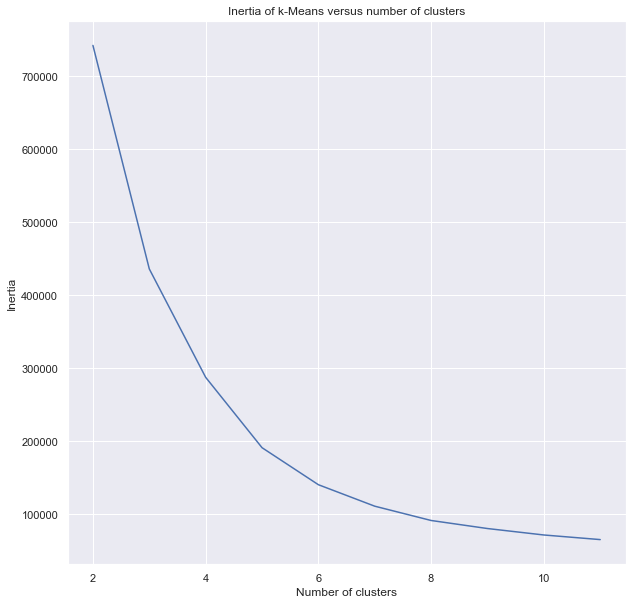

In [407]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i+2).fit(dataframe_k).inertia_ for i in range(10)]

from matplotlib import pyplot as plt
plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [408]:
n_clusters=5
kmeans = KMeans(init="random", 
                n_clusters= n_clusters,
                n_init=5,
                max_iter=300,
                random_state=42
               )

In [409]:
kmeans.fit(dataframe_k)

clusters = kmeans.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', kmeans.inertia_)

#print("Zona de los centroides", kmeans.cluster_centers_)

#print("Iteraciones", kmeans.n_iter_)

Suma de los cuadrados de las distancias al cluster / Inertia:  191115.86502156995


In [410]:
from sklearn.metrics import silhouette_score

score = silhouette_score (dataframe_k, kmeans.labels_, metric='euclidean')
print (f"For n_clusters = {n_clusters}, silhouette score is {score}")

For n_clusters = 5, silhouette score is 0.5057492645340026


from sklearn.metrics import silhouette_score

score = silhouette_score (dataframe_n, kmeans.labels_, metric='euclidean')
print (f"For n_clusters = 4, silhouette score is {score}")

In [411]:
df_clusters_k=dataframe_k.copy()
df_clusters_k['kmeans'] = kmeans.labels_

df_clusters_k.sample(3)

shooting  attacking_finishing  kmeans
179       69.0                   60       1
2329      33.0                   28       4
1529      50.0                   46       2

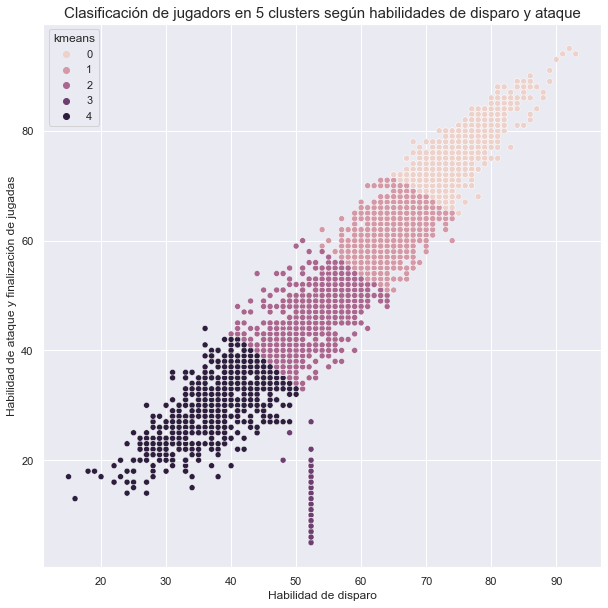

In [412]:
sns.set(context="notebook")

g = sns.scatterplot(data=df_clusters_k, x="shooting", y="attacking_finishing", hue="kmeans")

plt.ylabel('Habilidad de ataque y finalización de jugadas', fontdict={'fontsize': 12})
plt.xlabel('Habilidad de disparo', fontdict={'fontsize': 12})
plt.title('Clasificación de jugadors en 5 clusters según habilidades de disparo y ataque', fontdict={'fontsize': 15})
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

## DB SCAN

In [413]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.1, min_samples=10)

In [414]:
db.fit(dataframe_k)

DBSCAN(algorithm='auto', eps=0.1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [415]:
df_clusters_db = dataframe_k.copy()
df_clusters_db['Dbscan'] = db.labels_
labels = db.labels_

df_clusters_db.sample(3)

shooting  attacking_finishing  Dbscan
3272      45.0                   34      -1
2757      69.0                   69      57
4395      71.0                   70      41

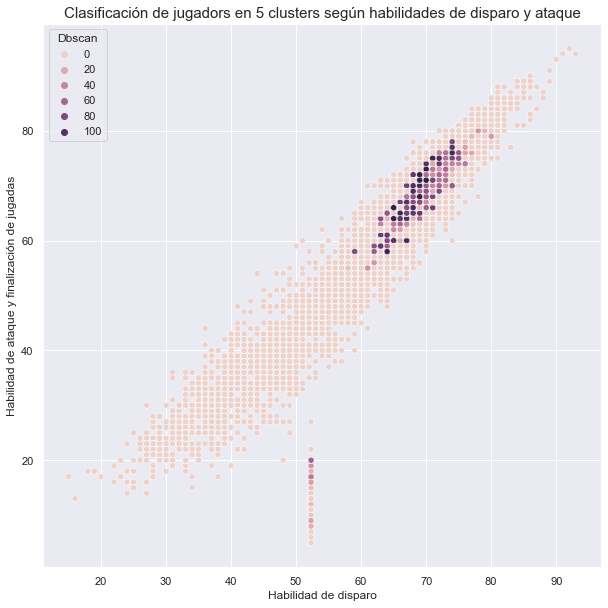

In [416]:
sns.set(context="notebook")

g = sns.scatterplot(data=df_clusters_db, x="shooting", y="attacking_finishing", hue="Dbscan")

plt.ylabel('Habilidad de ataque y finalización de jugadas', fontdict={'fontsize': 12})
plt.xlabel('Habilidad de disparo', fontdict={'fontsize': 12})
plt.title('Clasificación de jugadors en 5 clusters según habilidades de disparo y ataque', fontdict={'fontsize': 15})
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

Segun lo visto en clases, DBSCAN tiende a fallar cuando los datos se encuentran muy continuados, era de esperarse ya que trabaja con densidades de puntos 
y distancias

## WARD LINKAGE

In [417]:
from sklearn.cluster import AgglomerativeClustering

In [418]:
n_clusters = 4  # number of regions
ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')

In [419]:
ward.fit(dataframe_k)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

In [420]:
df_clusters_wl = dataframe_k.copy()
df_clusters_wl['Ward'] = ward.labels_
labels = ward.labels_

df_clusters_wl.sample(3)

shooting  attacking_finishing  Ward
800       28.0                   23     1
269       72.0                   76     2
1268      75.0                   76     2

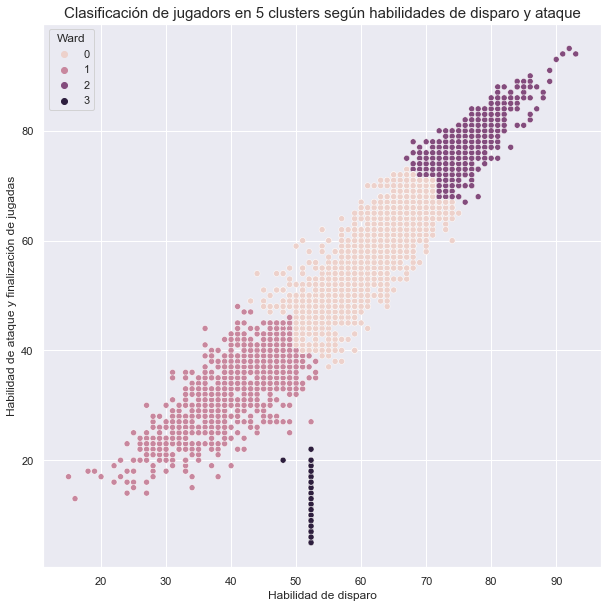

In [421]:
sns.set(context="notebook")

g = sns.scatterplot(data=df_clusters_wl, x="shooting", y="attacking_finishing", hue="Ward")

plt.ylabel('Habilidad de ataque y finalización de jugadas', fontdict={'fontsize': 12})
plt.xlabel('Habilidad de disparo', fontdict={'fontsize': 12})
plt.title('Clasificación de jugadors en 5 clusters según habilidades de disparo y ataque', fontdict={'fontsize': 15})
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

Tiende a juntar los outliers como un cluster mas

# Embedings

## PCA

In [422]:
from sklearn.preprocessing import StandardScaler

StdS = StandardScaler()
StdS.fit(dataframe_skills)

dataframe_scaled = StdS.transform(dataframe_skills)
dataframe_scaled = pd.DataFrame(dataframe_scaled, columns=[skills_ratings])
#dataframe_scaled = dataframe_scaled.drop(columns=['gk_diving', 'gk_handling', "gk_kicking", "gk_reflexes", "gk_speed", "gk_positioning" ])
dataframe_scaled.sample(3)

Acá hay que ver si es necesario escalar o no. En realidad el escalamiento es necesario si los datos tienen rangos de valores diferentes (acá van todos de 0 a 100, quizas no hace falta).
Dejo la implementación arriba igual

In [423]:
from sklearn.decomposition import PCA

dataframe_skills = dataframe_skills.drop(columns=["gk_diving", "gk_handling", "gk_kicking", "gk_reflexes", "gk_speed", "gk_positioning"])

pca = PCA(n_components=5)
pca.fit(dataframe_scaled)

In [424]:
pca = PCA(n_components=5)
pca.fit(dataframe_skills)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [425]:
dataframe_pca = pca.transform(dataframe_skills)
print(dataframe_pca.shape)
dataframe_pca = pd.DataFrame(dataframe_pca, columns=["A", "B", "C", "D", "E"])
dataframe_pca.sample(5)

(18278, 5)


A          B          C          D          E
7207   -53.317041 -26.978721   6.542931  -6.180665  -0.878468
2764   178.970331 -24.552758  53.770337  -8.072974 -21.207840
15453  -13.151395  10.396333  -7.380297   2.015203  17.086779
14146   25.400580 -54.099700 -36.895168  36.020983 -14.520941
10673  154.248030 -23.946983  50.525136 -15.459856  -5.158986

In [426]:
n_clusters=5
kmeans = KMeans(init="random", 
                n_clusters= n_clusters,
                n_init=5,
                max_iter=300,
                random_state=42
               )

In [427]:
kmeans.fit(dataframe_pca)

clusters = kmeans.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', kmeans.inertia_)

#print("Zona de los centroides", kmeans.cluster_centers_)

#print("Iteraciones", kmeans.n_iter_)

Suma de los cuadrados de las distancias al cluster / Inertia:  34370568.79886564


In [428]:
dataframe_pca=dataframe_pca.copy()
dataframe_pca['kmeans'] = kmeans.labels_

In [429]:
from sklearn.metrics import silhouette_score

score = silhouette_score (dataframe_pca, kmeans.labels_, metric='euclidean')
print (f"For n_clusters = {n_clusters}, silhouette score is {score}")

For n_clusters = 5, silhouette score is 0.35395927258680654


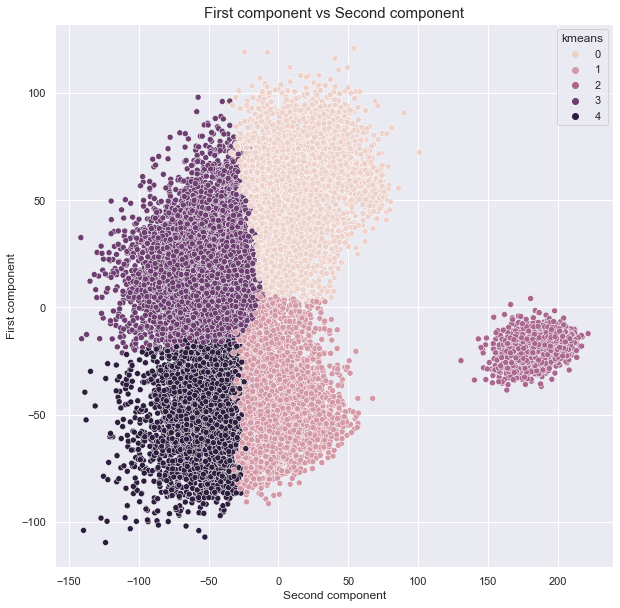

In [430]:
sns.set(context="notebook")

g = sns.scatterplot(data=dataframe_pca, x="A", y="B", hue="kmeans")

plt.ylabel('First component', fontdict={'fontsize': 12})
plt.xlabel('Second component', fontdict={'fontsize': 12})
plt.title('First component vs Second component', fontdict={'fontsize': 15})
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

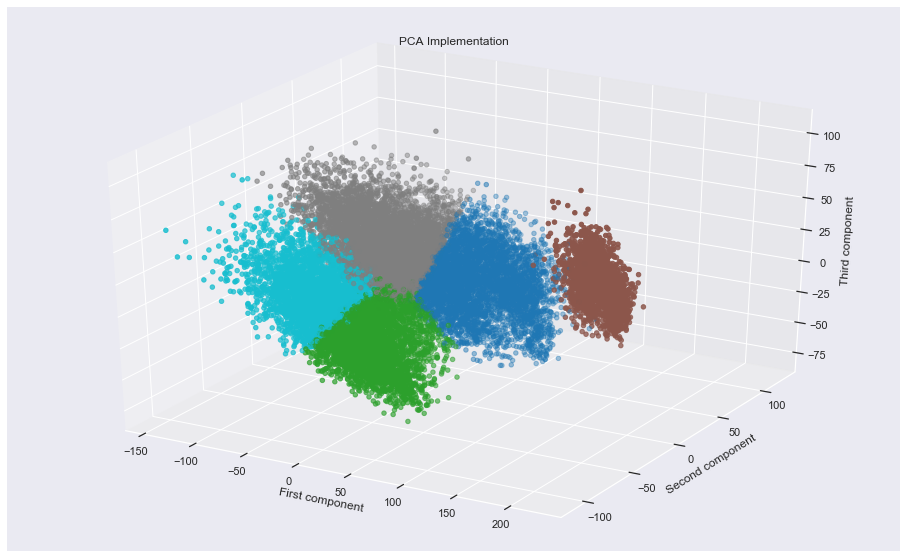

In [431]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dataframe_pca["A"], 
    ys=dataframe_pca["B"], 
    zs=dataframe_pca["C"], 
    c=dataframe_pca["kmeans"], 
    cmap='tab10'
)
ax.set_xlabel('First component')
ax.set_ylabel('Second component')
ax.set_zlabel('Third component')
ax.set_title('PCA Implementation')
plt.show()

## tsne

In [432]:
display(dataframe_skills.sample(3))

pace  shooting  passing  dribbling  defending  physic  \
11658  84.0      59.0     60.0       68.0       42.0    59.0   
4719   80.0      57.0     68.0       63.0       68.0    63.0   
5067   86.0      36.0     58.0       73.0       64.0    72.0   

       attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
11658                  53                   58                          40   
4719                   73                   52                          59   
5067                   67                   29                          57   

       attacking_short_passing  attacking_volleys  skill_dribbling  \
11658                       64                 45               67   
4719                        73                 54               61   
5067                        65                 35               73   

       skill_curve  skill_fk_accuracy  skill_long_passing  skill_ball_control  \
11658           42                 41                  64                  62   
4719            62                 48                  71                  64   
5067            56                 32                  49                  71   

       movement_acceleration  movement_sprint_speed  movement_agility  \
11658                     82                     86                91   
4719                      82                     79                62   
5067                      86                     86                77   

       movement_reactions  movement_balance  power_shot_power  power_jumping  \
11658                  62                76                65             52   
4719                   71                74                59             66   
5067                   68                74                42             69   

       power_stamina  power_strength  power_long_shots  mentality_aggression  \
11658             76              56                59                    45   
4719              67              62                62                    61   
5067              77              73                38                    64   

       mentality_interceptions  mentality_positioning  mentality_vision  \
11658                       62                     62                66   
4719                        64                     60                59   
5067                        64                     59                49   

       mentality_penalties  mentality_composure  defending_marking  \
11658                   48                   61                 40   
4719                    74                   70                 70   
5067                    35                   55                 62   

       defending_standing_tackle  defending_sliding_tackle  \
11658                         32                        36   
4719                          72                        67   
5067                          67                        63   

       goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
11658                   9                    14                   11   
4719                   10                     7                    8   
5067                    8                     6                   10   

       goalkeeping_positioning  goalkeeping_reflexes  overall  
11658                       12                     7       64  
4719                         7                    12       71  
5067                         7                    10       70

In [433]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)

In [434]:
tsne_obj= tsne.fit_transform(dataframe_skills)

In [435]:
tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1]})
tsne_df.head()

X          Y
0 -36.830379  44.518375
1 -39.439434  43.487823
2 -36.771309  44.477451
3 -13.171014 -76.443535
4 -36.822739  44.434162

In [436]:
n_clusters=5
kmeans = KMeans(init="random", 
                n_clusters= n_clusters,
                n_init=5,
                max_iter=300,
                random_state=42
               )

In [437]:
kmeans.fit(tsne_df)

clusters = kmeans.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', kmeans.inertia_)

#print("Zona de los centroides", kmeans.cluster_centers_)

#print("Iteraciones", kmeans.n_iter_)

Suma de los cuadrados de las distancias al cluster / Inertia:  7159804.713806897


In [438]:
tsne_df = tsne_df.copy()
tsne_df['kmeans'] = kmeans.labels_

In [439]:
from sklearn.metrics import silhouette_score

score = silhouette_score (tsne_df, kmeans.labels_, metric='euclidean')
print (f"For n_clusters = {n_clusters}, silhouette score is {score}")

For n_clusters = 5, silhouette score is 0.434528996989016


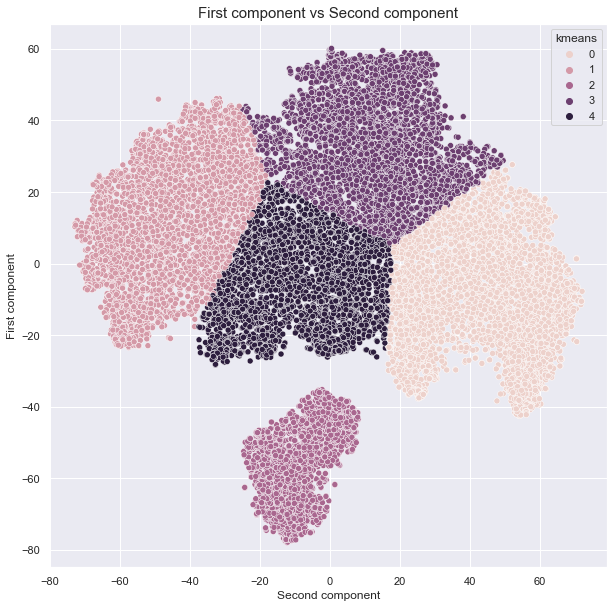

In [440]:
sns.set(context="notebook")

g = sns.scatterplot(data=tsne_df, x="X", y="Y", hue="kmeans")

plt.ylabel('First component', fontdict={'fontsize': 12})
plt.xlabel('Second component', fontdict={'fontsize': 12})
plt.title('First component vs Second component', fontdict={'fontsize': 15})
sns.set(rc={'figure.figsize':(10,10)})
plt.show()